# Pre-procesamiento de datos

### El objetivo de llevar a cabo este pre-procesamiento de los datos es convertir los datos de su formato inicial a un formato que sea mejor para practicar un análisis.  
### Vamos a pre-procesar un set de datos referente al consumo de diferentes coches.

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
# Los encabezados en este caso debemos introducirlos de forma manual
columnas = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
df = pd.read_csv('autos.csv',names=columnas)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Datos faltantes 

Observamos que ya en la segunda columna aparecen signos de interrogación. Debemos proceder al tratamiento de datos faltantes o desaparecidos: 

1) Identificar los datos
2) Tratarlos 
3) Corregir formato

En primer lugar vamos a convertir los signos de interrogación "?" a valores NaN (Not a Number)

In [4]:
df.replace('?', np.nan, inplace=True)#Importante utilizar inplace=True para modificar el dataframe
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


De una manera más visual, veamos qué datos faltan y cuales no haciendo un dataframe de la siguiente manera:

In [5]:
sin_valores = df.isnull()
sin_valores.head()
#True == El valor no aparece ; False == Existe un valor

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Utilizando un bucle for, procedemos a contar cuántos valores faltan en cada columna

In [6]:
for i in sin_valores.columns.values.tolist():
    print(i)
    print(sin_valores[i].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

## ¿Cómo tratamos estos datos que faltan?

### 1) Podemos eliminar toda la fila o toda la columna (solamente usar cuando la mayoría de datos son inexistentes) 

### 2) Sustitución de los datos: sustituir por la media o sustitución por frecuencia.

Para la columna de normalized-losses vamos a calcular la media y procederemos a sustituir los valores NaN por esa media.

In [7]:
media_normalizedloss = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan,media_normalizedloss,inplace=True)

Hacemos lo mismo para las demás columnas que tengan valores numéricos sin insertar: bore, stroke, horsepower y peak-rpm.

In [8]:
media_bore = df['bore'].astype('float').mean(axis=0)
media_stroke = df['stroke'].astype('float').mean(axis=0)
media_hp = df['horsepower'].astype('float').mean(axis=0)
media_peak = df['peak-rpm'].astype('float').mean(axis=0)

df['bore'].replace(np.nan,media_bore ,inplace=True)
df['stroke'].replace(np.nan, media_stroke,inplace=True)
df['horsepower'].replace(np.nan,media_hp ,inplace=True)
df['peak-rpm'].replace(np.nan, media_peak,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Podemos observar también que hay valores sin asignar en columnas que son categóricas: num-of-doors

In [9]:
df['num-of-doors'].isnull().value_counts()
#False== Existe un dato asignado; True== No existe dato asignado

False    203
True       2
Name: num-of-doors, dtype: int64

Para las variables categóricas aplicaremos la sustitución por frecuencia; el valor NaN será sustituido por la categoría que más se repita en esa columna.

In [10]:
valor_frecuente = df['num-of-doors'].value_counts().idxmax()#Valor más frecuente

In [11]:
df['num-of-doors'].replace(np.nan, valor_frecuente, inplace=True)

Finalmente, resulta conveniente a modo de ejemplo eliminar aquellas filas que no tienen la variable precio asignada. Podría calcularse la media o hacer algún tipo de regresión, pero dado que este notebook se encarga de procesamiento de datos, vamos a eliminar las filas sin precio.

In [12]:
df.dropna(subset=['price'],axis=0,inplace=True) #Eliminamos las filas con precio = NaN
df.reset_index(drop=True,inplace=True)#Reseteamos los indices y usamos inplace=True para aplicar los cambios

# Corregir el formato de los datos

Para conocer el formato de los datos se utiliza .dtypes() y para modificarlo (como ya hicimos antes) .astype()

In [13]:
#Veamos el formato de los datos que tenemos:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Como vemos algunos datos tienen un tipo asociado incorrecto. Lo lógico sería que los datos numéricos fueran de tipo "int" o "float", así que vamos a cambiar los tipos de "normalized-losses", "bore", "stroke", "price" y "peak-rpm"

In [14]:
df[["bore", "stroke","price","peak-rpm"]] = df[["bore", "stroke","price","peak-rpm"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Normalización de los datos

En este apartado vamos a centrarnos en transformar los valores de diferentes variables a un rango similar. Como ejemplo, vamos a normalizar "length", "width" y "height".

Como primera aproximación dividiremos el valor de cada columna entre su máximo así el rango quedará acotado entre 0 y 1.

In [15]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [16]:
df[['length','width','height']].head()#Comprobamos que efectivamente los valores oscilan entre 0 y 1.

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Podemos automatizar el proceso mediante un bucle. Si tenemos N variables a normalizar y vamos a aplicar el mismo procedimiento a cada una de ellas:


In [17]:

#caracteristicas = ['car1','car2',...,'carN'] #de forma que len(caracteristicas)=N
#for caracteristica in caracteristicas:
 #   df[caracteristica] = df[caracteristica]/df[caracteristica].max()


# Binning de datos

Aplicaremos este procedimiento a la columna 'horsepower'. En primer lugar vamos a estudiar de qué forma es la distribución mediante un histograma:

Text(0.5, 1.0, 'Binning de variable horsepower')

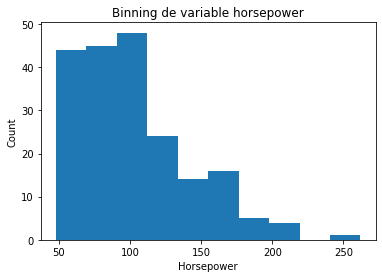

In [18]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Binning de variable horsepower")

El procedimiento de binning se aplicaría de la siguiente forma:

In [19]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4) #Creamos los límites de cada categoría
categorias = ['Bajo', 'Medio', 'Alto'] #Nombramos las categorías

In [20]:
df['horsepower-bin'] = pd.cut(df['horsepower'], bins, labels=categorias, include_lowest=True ) #separamos los datos en cada categoría
df[['horsepower','horsepower-bin']].head(10)

,horsepower,horsepower-bin
0,111,Bajo
1,111,Bajo
2,154,Medio
3,102,Bajo
4,115,Bajo
5,110,Bajo
6,110,Bajo
7,110,Bajo
8,140,Medio
9,101,Bajo


Text(0.5, 1.0, 'Variable Horsepower Bin')

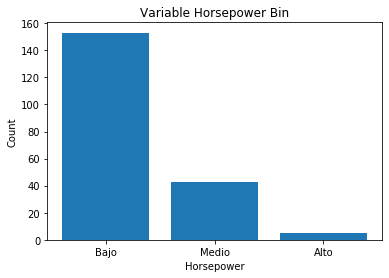

In [21]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(categorias, df["horsepower-bin"].value_counts())

plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Variable Horsepower Bin")

# Conversión de variables categóricas a numéricas

Vamos a convertir la variable categórica 'fuel-type' a numérica haciendo uso del método get_dummies. Esto generará un dataframe nuevo con un número de columnas igual al número de categorías existentes dentro de la columna que seleccionemos:

In [22]:
dum_1 = pd.get_dummies(df["fuel-type"])

In [23]:
dum_1.rename(columns={'gas':'Gas', 'diesel':'Diesel'}, inplace=True)#Podemos renombrar las columnas de esta forma
dum_1.head()

,Diesel,Gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [24]:
#Unimos el dataframe original con el dataframe que acabamos de generar
df = pd.concat([df, dum_1], axis=1)

#Vamos a eliminar la variable fuel-type de nuestro dataframe
df.drop("fuel-type", axis = 1, inplace=True)

df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-bin,Diesel,Gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,13495.0,Bajo,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,16500.0,Bajo,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,19,26,16500.0,Medio,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,24,30,13950.0,Bajo,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,18,22,17450.0,Bajo,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,3.40,8.5,110,5500.0,19,25,15250.0,Bajo,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,3.40,8.5,110,5500.0,19,25,17710.0,Bajo,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,3.40,8.5,110,5500.0,19,25,18920.0,Bajo,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,3.40,8.3,140,5500.0,17,20,23875.0,Medio,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,2.80,8.8,101,5800.0,23,29,16430.0,Bajo,0,1
